<a href="https://colab.research.google.com/github/5655530/AIFFEL_CORE_QUEST/blob/main/mnist_%EC%98%88%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **모듈 임포트**
---

딥러닝을 사용하는데 필요한 라이브러리인 Tensorflow와 keras를 임포트하고, 케라스(Keras)의 모델, 레이어, 옵티마이저, 유틸을 사용할 수 있도록 models, layers, optimizer, utils를 임포트합니다.

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers, utils

##**데이터 로드 및 전처리**
---
이제 우리가 사용할 MNIST 데이터셋을 로드하기 위해서 케라스의 데이터셋에 내장되어 있는 tensorflow.keras.datasets.mnist를 임포트합니다. 그리고 train_test_split() 함수를 이용해 학습용 데이터인 x_train_full와 y_train_full를 나누어서 70%는 학습용 데이터인 x_train와 y_train으로 사용하고, 30%는 검증 데이터인 x_val와 y_val로 사용합니다.

데이터셋이 어떻게 구성되었는지 출력해보면, 전체 60,000개의 학습 데이터 중에서 70%인 42,000개가 학습용 데이터로 나눠지고, 30%인 18,000개가 검증용 데이터로 나눠졌으며, 테스트용으로는 10,000개가 주어진 것을 알 수 있습니다.

In [2]:
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split

(x_train_full, y_train_full), (x_test, y_test) = mnist.load_data(path='mnist.npz')

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.3,
                                                  random_state=123)

print(f"전체 학습 데이터: {x_train_full.shape}  레이블: {y_train_full.shape}")
print(f"학습용 데이터: {x_train.shape}  레이블: {y_train.shape}")
print(f"검증용 데이터: {x_val.shape}  레이블: {y_val.shape}")
print(f"테스트용 데이터: {x_test.shape}  레이블: {y_test.shape}")

11490434/11490434 [==============================] - 0s 0us/step
전체 학습 데이터: (60000, 28, 28)  레이블: (60000,)
학습용 데이터: (42000, 28, 28)  레이블: (42000,)
검증용 데이터: (18000, 28, 28)  레이블: (18000,)
테스트용 데이터: (10000, 28, 28)  레이블: (10000,)


MNIST 데이터셋에 실제 숫자 이미지가 어떻게 구성되어 있는지 60,000개 중에서 6개만 랜덤으로 x_train_full과 y_train_full에서 추출하여 표시해보도록 하겠습니다.

<ipython-input-3-b02a27be085e>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-white")


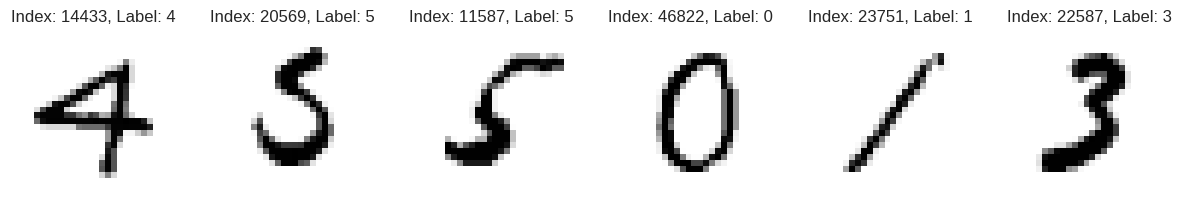

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-white")

num_sample = 6
random_idxs = np.random.randint(60000, size=num_sample)

plt.figure(figsize=(15, 3))
for i, idx in enumerate(random_idxs):
  img = x_train_full[idx, :]
  label = y_train_full[idx]

  plt.subplot(1, len(random_idxs), i+1)
  plt.axis('off')
  plt.title(f'Index: {idx}, Label: {label}')
  plt.imshow(img)


MNIST의 학습용 데이터가 실제 값으로는 어떻게 구성되어있는지 출력을 해보면, y_train의 0번째는 4라는 값이 저장되어 있는걸 알 수 있고, x_train의 0번째에는 숫자 4에 대한 이미지를 0~255 사이의 값으로 표현하고 있음을 알 수 있습니다.

In [4]:
print(y_train[0])

4


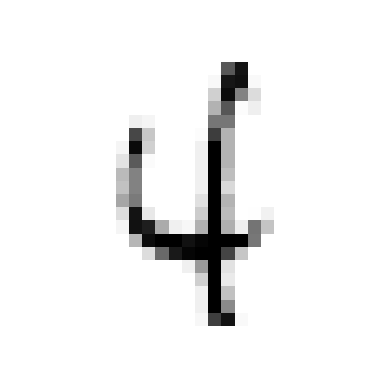

In [5]:
img = x_train[0, :]
plt.axis('off')
plt.imshow(img)

In [6]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 184 236
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  13 235 240
   11   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  73 244 144
   59   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 104 186   6
   32   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  33  21   0   0   0   0 15

MNIST 데이터셋을 가지고 본격적으로 딥러닝 모델에 사용하기 위해서는 전처리 과정이 필요합니다. 본 예제에서는 간단한 전처리만 사용해서 x_train, x_val 그리고 x_test의 값들을 255로 나누어줍니다. 이미지의 픽셀이 표현하는 값의 범위가 0 ~ 255이기 때문에 최대값인 255로 나누어주면, 값이 0 ~ 1 사이의 범위로 스케일링되어 학습에 용이해집니다.

y_train, y_val, 그리고 y_test의 경우에는 0부터 9까지의 숫자를 나타내는 레이블이기 때문에 총 10개의 값을 가지는 범주형입니다. 따라서 utils.to_categorical을 이용해 원-핫 인코딩을 수행합니다. 즉 정답에는 1을, 나머지의 값은 0을 부여합니다.

In [7]:
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

y_train = utils.to_categorical(y_train)
y_val = utils.to_categorical(y_val)
y_test = utils.to_categorical(y_test)

print(y_train[0])
print(y_val[0])
print(y_test[0])

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


##**모델구성**
---
딥러닝 모델 구성을 위해서 Sequential() 함수를 이용해 순차적으로 레이어를 구성합니다. 먼저 MNIST 데이터셋의 숫자 이미지가 28 x 28 사이즈를 사용하므로 입력 객체로 keras.Input를 사용할 때, shape을 (28, 28)로 지정해줍니다. 그리고 1차원으로 쭉 펼쳐주는 layers.Flatten 레이어를 사용하여 입력 데이터 모양이 2차원인 28 x 28 크기를 1차원으로 784 크기를 갖도록 변형해줍니다.

그 이후 레이어로 layers.Dense를 여러겹 사용하여 유닛수를 100, 64, 32, 10으로 4겹 쌓아주고, 활성화 함수로 relu를 사용합니다. 여기서 MNIST의 숫자가 0부터 9까지 총 10개 이므로 마지막 레이어에서는 전체 카테고리의 수인 10을 유닛수로 지정하고, 활성화 함수는 softmax를 사용하여 각 카테고리별 확률 값을 구합니다.

In [8]:
model = models.Sequential()
model.add(keras.Input(shape=(28, 28), name='input'))
model.add(layers.Flatten(input_shape=[28, 28], name='flatten'))
model.add(layers.Dense(100, activation='relu', name='dense1'))
model.add(layers.Dense(64, activation='relu', name='dense2'))
model.add(layers.Dense(32, activation='relu', name='dense3'))
model.add(layers.Dense(10, activation='softmax', name='output'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense1 (Dense)              (None, 100)               78500     
                                                                 
 dense2 (Dense)              (None, 64)                6464      
                                                                 
 dense3 (Dense)              (None, 32)                2080      
                                                                 
 output (Dense)              (None, 10)                330       
                                                                 
Total params: 87,374
Trainable params: 87,374
Non-trainable params: 0
_________________________________________________________________


생성한 모델의 구성을 그림을 통해 확인합니다.

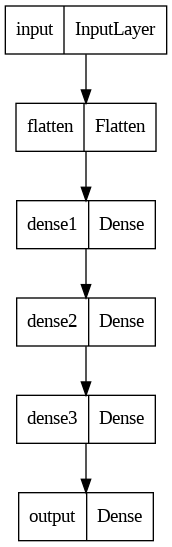

In [9]:
utils.plot_model(model)

모델의 구성을 각 레이어의 모양까지 함께 살펴보도록 합니다.

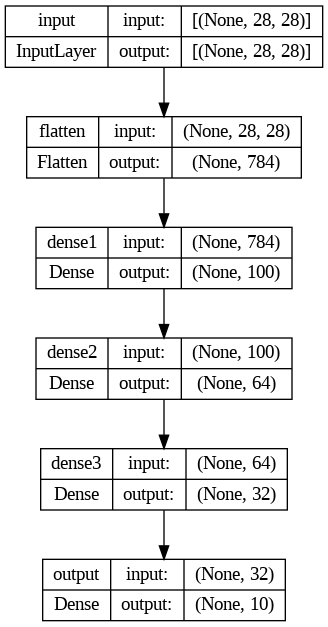

In [10]:
utils.plot_model(model, show_shapes=True)

## **모델 컴파일 및 학습**
---
구성한 모델에 손실 함수로는 다중 분류로 클래스가 원-핫 인코딩 방식으로 되어 있을 때 사용하는 categorical_crossentropy를 지정하고, 옵티마이저는 가장 기본적인 sgd을 지정합니다. 그리고 분류에 대한 성능을 확인하기 위한 지표로 accuracy를 지정합니다.

In [11]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

이제 본격적으로 딥러닝 모델을 학습하기 위해 fit을 실행시키는데, 이때 학습에 사용되는 데이터로 x_train과 y_train을 지정하고, 학습을 반복하는 에폭 수(epochs)는 50으로 지정하며, 배치 사이즈(batch_size)는 128로 지정합니다. 그리고 검증을 위해서 나누었던 데이터로 x_val와 y_val을 지정해줍니다.

In [12]:
history = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/50
329/329 [==============================] - 4s 8ms/step - loss: 1.7548 - accuracy: 0.5259 - val_loss: 1.0006 - val_accuracy: 0.7868
Epoch 2/50
329/329 [==============================] - 2s 7ms/step - loss: 0.6708 - accuracy: 0.8378 - val_loss: 0.5321 - val_accuracy: 0.8516
Epoch 3/50
329/329 [==============================] - 2s 7ms/step - loss: 0.4541 - accuracy: 0.8734 - val_loss: 0.4205 - val_accuracy: 0.8793
Epoch 4/50
329/329 [==============================] - 3s 9ms/step - loss: 0.3895 - accuracy: 0.8900 - val_loss: 0.3811 - val_accuracy: 0.8866
Epoch 5/50
329/329 [==============================] - 2s 6ms/step - loss: 0.3531 - accuracy: 0.9006 - val_loss: 0.3443 - val_accuracy: 0.8990
Epoch 6/50
329/329 [==============================] - 2s 5ms/step - loss: 0.3273 - accuracy: 0.9081 - val_loss: 0.3247 - val_accuracy: 0.9052
Epoch 7/50
329/329 [==============================] - 2s 5ms/step - loss: 0.3067 - accuracy: 0.9120 - val_loss: 0.3171 - val_accuracy: 0.9076
Epoch 

모델이 학습을 진행하면서 각 에폭마다 지표 결과들을 history로 저장을 합니다. 저장된 형태를 보면 loss, accuracy, val_loss, val_accuracy로 구분되는걸 알 수 있습니다.

In [13]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

history에 저장된 결과 값들이 에폭이 진행되면서 변화되는 추이를 살펴보기 위해서 시각화합니다.

첫 번째 차트에서는 loss와 val_loss를 함께 보여주고, 두 번째 차트에서는 accuracy와 val_accuracy를 함께 보여줍니다.

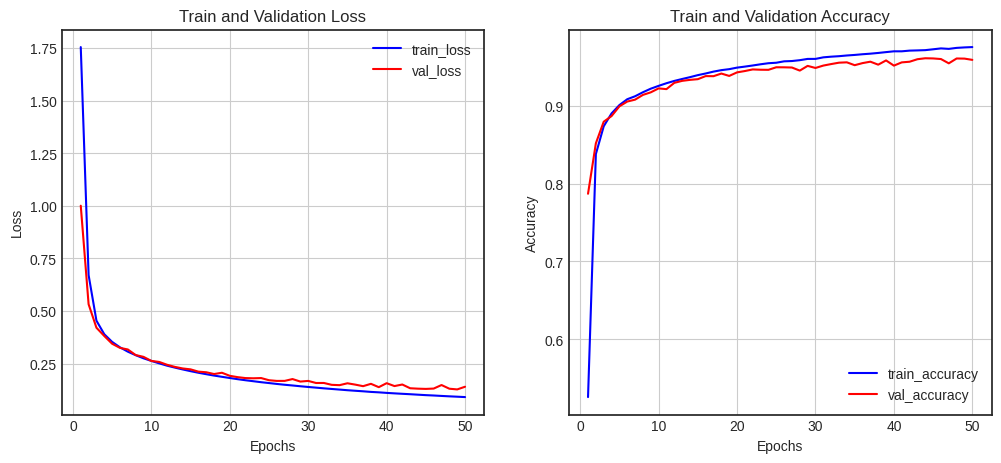

In [14]:
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, color='blue', label='train_accuracy')
ax2.plot(epochs, val_accuracy, color='red', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

##**모델평가 및 예측**
---
학습된 모델의 평가를 위해서 x_test와 y_test를 대상으로 evaluate() 함수를 동작시킵니다.

In [15]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 5ms/step - loss: 0.1423 - accuracy: 0.9561


[0.14231202006340027, 0.9560999870300293]

학습된 모델의 예측을 위해 x_test를 넣고, 그에 대한 예측 결과를 받아서 0번째 결과만 확인을 해보면, 최종 레이어인 유닛 수 10개의 softmax를 활성화 함수로 통과한 결과인 것을 알 수 있습니다.

In [16]:
pred_ys = model.predict(x_test)
print(pred_ys.shape)
print(pred_ys[0])

313/313 [==============================] - 1s 3ms/step
(10000, 10)
[6.7505563e-05 2.2353674e-06 1.1958780e-03 2.1052512e-03 9.5718411e-10
 1.4293771e-05 4.9610390e-12 9.9653232e-01 2.3284756e-05 5.9201298e-05]


결과값 중에서 가장 큰 수가 있는 위치값을 np.argmax()를 통해서 구하고, 예측한 레이블 값 arg_pred_y[0]과 실제 숫자 이미지인 x_test[0]를 출력해봅니다.

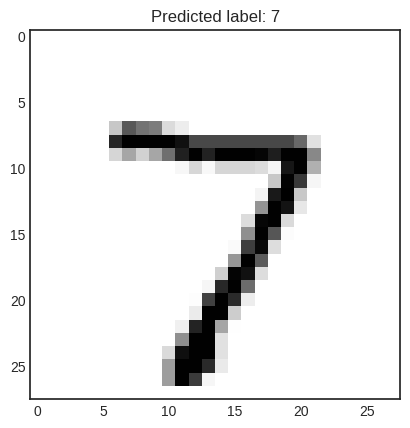

In [17]:
arg_pred_y = np.argmax(pred_ys, axis=1)

plt.title(f'Predicted label: {arg_pred_y[0]}')
plt.imshow(x_test[0])
plt.show()

모델이 제대로 분류를 수행했는지 알기 위해서 사이킷런(Scikit-Learn)에 포함된 classification_report를 임포트해서 각종 지표들을 한눈에 살펴봅니다.

In [18]:
from sklearn.metrics import classification_report

print(classification_report(np.argmax(y_test, axis=-1), np.argmax(pred_ys, axis=-1)))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       980
           1       0.98      0.98      0.98      1135
           2       0.95      0.97      0.96      1032
           3       0.92      0.97      0.95      1010
           4       0.94      0.98      0.96       982
           5       0.98      0.91      0.94       892
           6       0.97      0.97      0.97       958
           7       0.96      0.95      0.95      1028
           8       0.92      0.96      0.94       974
           9       0.99      0.88      0.93      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



각 레이블 별로 분류가 얼마나 잘 수행되었는지 한눈에 살펴볼 수 있도록 혼동 행렬(Confusion Matrix)을 이용해 시각화합니다.

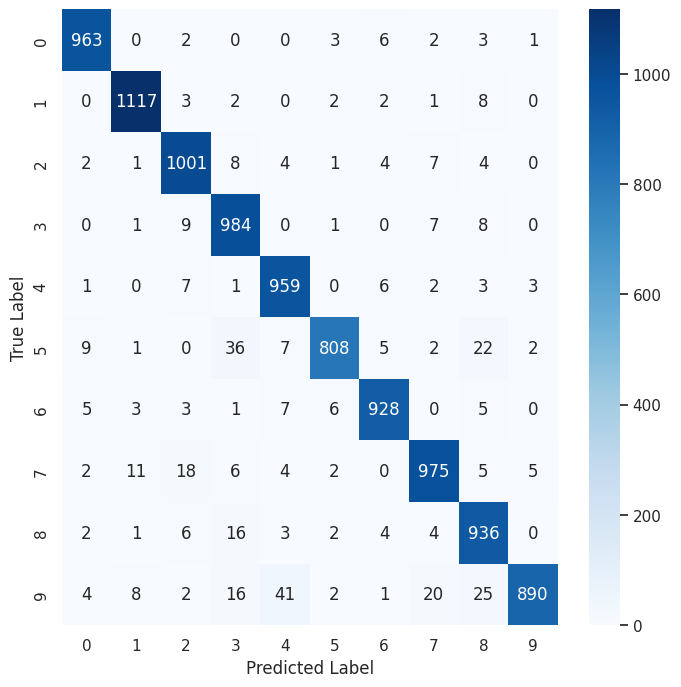

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set(style='white')

plt.figure(figsize=(8, 8))
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(pred_ys, axis=-1))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()